In [1]:
from scCAPE import sccape
from scCAPE import plotting
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import pickle
import gseapy as gp
from fractions import Fraction
import scipy
from scipy.sparse import csr_matrix

In [2]:
import random
import torch
import sklearn
import os
def set_seed(seed: int):
    # Set Python random seed
    random.seed(seed)

    # Set NumPy random seed
    np.random.seed(seed)

    # Set PyTorch random seed
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # If using multi-GPU.

        # Ensure deterministic behavior in PyTorch (can slow down computations)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

    # Set sklearn random seed
    sklearn.utils.check_random_state(seed)

    # Set environment variable for reproducibility
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(123)

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import os
import multiprocessing
'''
multiprocessing.set_start_method('spawn', force=True)
multiprocessing.set_start_method('forkserver', force=True)
warnings.filterwarnings('ignore', category=DeprecationWarning, module='multiprocessing')

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
'''
def run_sccape(adata, condition_key, cell_type_key, exp_label, ref_label, dataset_name):
    dataset_name1= "z_"+dataset_name

    print(adata)
    if adata.shape[1]>2000:
        sc.pp.highly_variable_genes(adata, n_top_genes=2000)
        adata = adata[:, adata.var["highly_variable"]]
    
    if isinstance(adata.X, scipy.sparse.spmatrix):
        X_dense = adata.X.toarray()
    
    adata.obs["condition"]=adata.obs[condition_key].copy()
    adata.write("./scCAPE/tmp.h5ad")
    
    data_x=csr_matrix(adata.X.T)
    sccape.onmf(data=data_x, dataset_name=dataset_name1, ncells=2000, nfactors=list(range(5, 16)),nreps=2, niters=500)
    
    try:
        sccape.CAPE_train(data_path="./scCAPE/tmp.h5ad", dataset_name=dataset_name1, perturbation_key='condition', split_key=None,
                      max_epochs=300, lambda_adv=0.5, lambda_ort=0.5, patience=5, model_index=0, hparams=None,
                      verbose=True)
    except Exception as e:
        print("Error occurred during scCAPE training:", str(e))


    latent_adata = sc.read_h5ad(os.path.join(dataset_name1, 'CAPE', 'model_index=0_basal.h5ad'))
    latent_adata.obsm["latent"] = latent_adata.X
    latent_adata.obs = adata.obs

    sc.pp.neighbors(latent_adata)
    sc.tl.umap(latent_adata)
    sc.pl.umap(
        latent_adata,
        color=[condition_key, cell_type_key],
        wspace=0.4,
        frameon=False
    )
    latent_adata.write("./scCAPE/" + dataset_name + ".h5ad")

    import rpy2.robjects as robjects

    import rpy2.robjects as robjects
    from rpy2.robjects import pandas2ri
    pandas2ri.activate()

    import anndata2ri
    anndata2ri.activate()

    # Add your library path
    library_path = "/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3/"  # Replace with the actual path
    # Update R's library paths
    robjects.r(f'.libPaths(c("{library_path}", .libPaths()))')
    # Verify the updated library paths
    print(robjects.r('.libPaths()'))

    from metrics import calculate_metrics

    import warnings
    warnings.filterwarnings("ignore")
    warnings.filterwarnings("ignore", category=FutureWarning)
    
    try:
        calculate_metrics(latent_adata, batch_key=condition_key, celltype_key=cell_type_key, all=True, n_neighbors=15,
                          embed='latent', savepath="./scCAPE/" + dataset_name + ".csv")
    except:
        calculate_metrics(latent_adata, batch_key=condition_key, celltype_key=cell_type_key, all=True, n_neighbors=15,
                          embed='latent', savepath="./scCAPE/" + dataset_name + ".csv")

# PBMC

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE96583

https://drive.google.com/uc?id=1r87vhoLLq6PXAYdmyyd89zG90eJOFYLk

AnnData object with n_obs × n_vars = 16893 × 6998
    obs: 'condition', 'n_counts', 'n_genes', 'mt_frac', 'cell_type'
    var: 'gene_symbol', 'n_cells'
    uns: 'cell_type_colors', 'condition_colors', 'neighbors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'distances', 'connectivities'


Computing W matrices...


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #400

......... Iteration #0

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #100

......... Iteration #0

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #100

......... Iteration #200

......... Iteration #100

......... Iteration #300

......... Iteration #200

......... Iteration #400

......... Iteration #300

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #400

......... Iteration #0

......... Iteration #100

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #200

......... Iteration #0

......... Iteration #300

......... Iteration #100

......... Iteration #400

......... Iteration #200

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #300

......... Iteration #100

......... Iteration #400

......... Iteration #200

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #300

......... Iteration #100

......... Iteration #400

......... Iteration #200

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #300

......... Iteration #100

......... Iteration #400

......... Iteration #200

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #300

......... Iteration #100

......... Iteration #400

......... Iteration #200

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #300

......... Iteration #100

......... Iteration #400

......... Iteration #200

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #300

......... Iteration #0

......... Iteration #400

......... Iteration #100

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #200

......... Iteration #100

......... Iteration #300

......... Iteration #200

......... Iteration #400

......... Iteration #300

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #100

......... Iteration #200

......... Iteration #300

......... Iteration #100

......... Iteration #400

......... Iteration #200

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #300

......... Iteration #0

......... Iteration #400

......... Iteration #100

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #200

......... Iteration #0

......... Iteration #300

......... Iteration #100

......... Iteration #400

......... Iteration #200

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #300

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #100

......... Iteration #200

......... Iteration #300

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


Computing reconstruction errors...


Finding optimal factor number k...


Finish oNMF initialization. See the results in folder:z_PBMC/oNMF
Performing automatic train-test split with 0.2 ratio...


Assigned 8007 control cells.
Performing DEG analysis...


Finish epoch:4
loss:0.06694069153295373
iteration:265
l2 loss: 0.0021678348783544213


Finish epoch:9
loss:0.05794125886739425
iteration:530
l2 loss: 0.003025367834060541


Finish epoch:14
loss:0.04836223049546188
iteration:795
l2 loss: 0.0043335906229913235


Finish epoch:19
loss:0.04236247313191306
iteration:1060
l2 loss: 0.0051397555419858895


Finish epoch:24
loss:0.037464379350531776
iteration:1325
l2 loss: 0.005036003395633877


Finish epoch:29
loss:0.03556007793489492
iteration:1590
l2 loss: 0.0046913900570768234


Finish epoch:34
loss:0.033825091314765646
iteration:1855
l2 loss: 0.004061549436300993


Finish epoch:39
loss:0.032191102269966645
iteration:2120
l2 loss: 0.0036603042741639997


Finish epoch:44
loss:0.03116501952117344
iteration:2385
l2 loss: 0.0032490087444630436


Finish epoch:49
loss:0.03106190021729694
iteration:2650
l2 loss: 0.0027364488858026715


Finish epoch:54
loss:0.029885826280938006
iteration:2915
l2 loss: 0.0023805745130510265


Finish epoch:59
loss:0.030539519873992452
iteration:3180
l2 loss: 0.002095434287527822


Finish epoch:64
loss:0.02932633803981655
iteration:3445
l2 loss: 0.0018014990513757715


Finish epoch:69
loss:0.030439736602722475
iteration:3710
l2 loss: 0.0015575044551196526


Finish epoch:74
loss:0.029044123788206082
iteration:3975
l2 loss: 0.0013498844236205772


Finish epoch:79
loss:0.029414659682309854
iteration:4240
l2 loss: 0.001198787872574099


Finish epoch:84
loss:0.030939390777416947
iteration:4505
l2 loss: 0.0010612461614896947


Finish epoch:89
loss:0.03182239236556134
iteration:4770
l2 loss: 0.0009698422355489489


Finish epoch:94
loss:0.0293042326943492
iteration:5035
l2 loss: 0.000872579248367264


Finish epoch:99
loss:0.028919984850118746
iteration:5300
l2 loss: 0.0007961889803585298


Finish epoch:104
loss:0.02867160350927767
iteration:5565
l2 loss: 0.0007479312436497015


Finish epoch:109
loss:0.029331559385612327
iteration:5830
l2 loss: 0.0006872523962607924


Finish epoch:114
loss:0.028697398016756435
iteration:6095
l2 loss: 0.0006239004224486087


Finish epoch:119
loss:0.028229782533533167
iteration:6360
l2 loss: 0.0006178939717224324


Finish epoch:124
loss:0.028066946439585596
iteration:6625
l2 loss: 0.0005623394665132575


Finish epoch:129
loss:0.027996872182724612
iteration:6890
l2 loss: 0.0005365589563295527


Finish epoch:134
loss:0.02785909949046261
iteration:7155
l2 loss: 0.0005211210820630615


Finish epoch:139
loss:0.02786857951081024
iteration:7420
l2 loss: 0.0004915687055678441
Training stop at epoch 139
Plotting the loss and metrics...


Calculating the basal state and factor-level expression of each cell...
Checking the mixing performance...
Silhouette score...


Silhouette score...


Finish adversarial training. See the results in folder:z_PBMC/CAPE


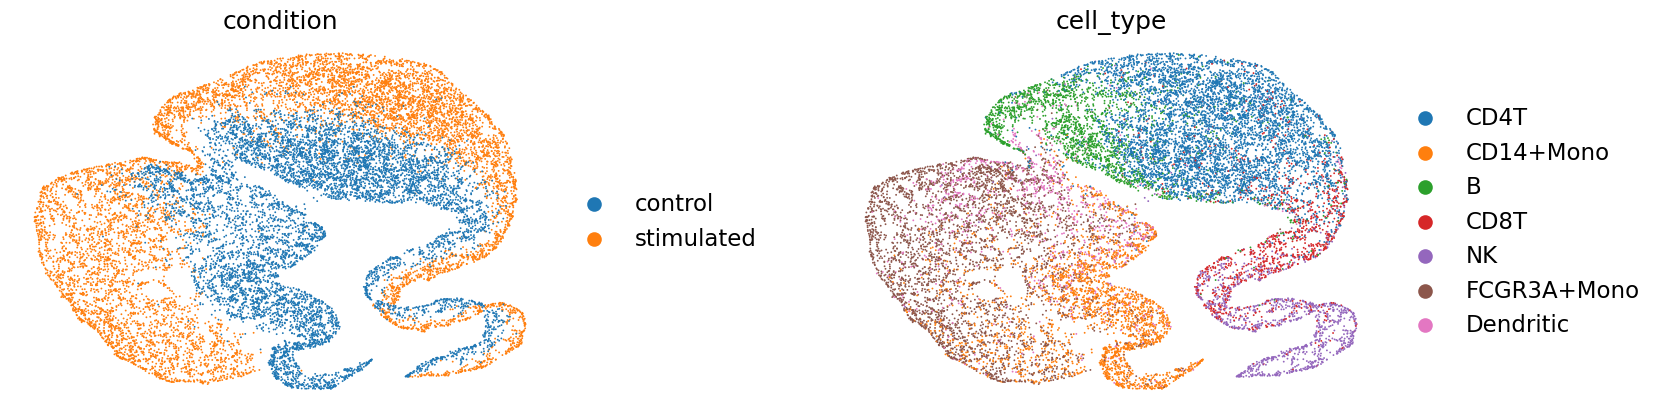

['/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3'
 '/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/library']
R_HOME is already set to: /vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R


LISI---


cLISI, bLISI, LISI_F1 0.9208360917942543 0.09488990501313146 0.17205043399039766


ASW---


asw_label 0.5670960545539856


asw_batch 0.7542328409014617


kBET---


0 labels consist of a single batch or is too small. Skip.


Adding diffusion to step 4


Adding diffusion to step 5


Adding diffusion to step 6


Adding diffusion to step 7


Adding diffusion to step 8


Adding diffusion to step 9


Adding diffusion to step 4
Adding diffusion to step 5


Adding diffusion to step 6


Adding diffusion to step 7


Adding diffusion to step 8


Adding diffusion to step 9


Adding diffusion to step 10


Adding diffusion to step 4
Adding diffusion to step 5


Adding diffusion to step 6


Adding diffusion to step 7


Adding diffusion to step 8


Adding diffusion to step 9


Adding diffusion to step 10


Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
Adding diffusion to step 8


Adding diffusion to step 9


Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7


Adding diffusion to step 8
Adding diffusion to step 9


Adding diffusion to step 10
Adding diffusion to step 11


Adding diffusion to step 12
Adding diffusion to step 13


Adding diffusion to step 4


Adding diffusion to step 5


Adding diffusion to step 6


Adding diffusion to step 7


Adding diffusion to step 8


Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
Adding diffusion to step 8
Adding diffusion to step 9
Adding diffusion to step 10


Adding diffusion to step 11
Adding diffusion to step 12
Adding diffusion to step 13
Adding diffusion to step 14


Adding diffusion to step 15
Adding diffusion to step 16
Adding diffusion to step 17


Adding diffusion to step 18
Adding diffusion to step 19


kbet_score 0.06468787436916223
graph_conn 0.8949953946789992


NMI, ARI ---
NMI 0.5758043121104989
ARI 0.5263482259354985
positive and true positive rate---


        ASW_label       ARI       NMI   1-cLISI    bLISI  ASW_batch  \
latent   0.567096  0.526348  0.575804  0.920836  0.09489   0.754233   

        kBET Accept Rate  graph connectivity  PCR_batch  pos rate  \
latent          0.064688            0.894995        0.0   0.76511   

        true pos rate  F1 LISI  
latent       0.031966  0.17205  


In [4]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

adata = sc.read_h5ad('../data/PBMC.h5ad')
run_sccape(adata=adata, condition_key='condition', cell_type_key='cell_type', exp_label='stimulated', ref_label='control', dataset_name="PBMC")

# PBMC (yale)

https://datadryad.org/stash/dataset/doi:10.5061/dryad.4xgxd25g1

AnnData object with n_obs × n_vars = 20819 × 773
    obs: 'perturbation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'leiden', 'cell_type0528'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type0528_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'perturbation_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


Computing W matrices...


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #100

......... Iteration #200

......... Iteration #300

......... Iteration #0

......... Iteration #400

......... Iteration #100

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #200

......... Iteration #300

......... Iteration #0

......... Iteration #400

......... Iteration #100

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #200

......... Iteration #300

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #100

......... Iteration #0

......... Iteration #200

......... Iteration #100

......... Iteration #300

......... Iteration #400

......... Iteration #200

......... Iteration #300

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #100

......... Iteration #200

......... Iteration #300

......... Iteration #0

......... Iteration #400

......... Iteration #100

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #200

......... Iteration #0

......... Iteration #300

......... Iteration #100

......... Iteration #400

......... Iteration #200

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #300

......... Iteration #400

......... Iteration #0

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #100

......... Iteration #200

......... Iteration #300

......... Iteration #0

......... Iteration #400

......... Iteration #100

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #200

......... Iteration #0

......... Iteration #300

......... Iteration #400

......... Iteration #100

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #200

......... Iteration #300

......... Iteration #0

......... Iteration #400

......... Iteration #100

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #200

......... Iteration #300

......... Iteration #0

......... Iteration #400

......... Iteration #100

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #200

......... Iteration #300

......... Iteration #400

......... Iteration #499

......... Iteration #0

Orthogonal NMF performed with 500 iterations


......... Iteration #100

......... Iteration #200

......... Iteration #0

......... Iteration #300

......... Iteration #100

......... Iteration #400

......... Iteration #200

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #300

......... Iteration #0

......... Iteration #400

......... Iteration #100

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #200

......... Iteration #300

......... Iteration #400

......... Iteration #0

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #100

......... Iteration #200

......... Iteration #0

......... Iteration #300

......... Iteration #400

......... Iteration #100

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #200

......... Iteration #300

......... Iteration #0

......... Iteration #400

......... Iteration #100

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #200

......... Iteration #300

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #100

......... Iteration #200

......... Iteration #300

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


Computing reconstruction errors...


Finding optimal factor number k...


Finish oNMF initialization. See the results in folder:z_PBMC_yale/oNMF
Performing automatic train-test split with 0.2 ratio...


Assigned 0 control cells.
Performing DEG analysis...


Performing leiden clustering...


Finish epoch:4
loss:0.8341868629822364
iteration:325
l2 loss: 0.00975885187777189


Finish epoch:9
loss:0.800177747469682
iteration:650
l2 loss: 0.016497214511036872


Finish epoch:14
loss:0.7812851419815651
iteration:975
l2 loss: 0.016368212178349495


Finish epoch:19
loss:0.7697365045547485
iteration:1300
l2 loss: 0.014582505736213464


Finish epoch:24
loss:0.7609450065172636
iteration:1625
l2 loss: 0.013208860130264208


Finish epoch:29
loss:0.754489280627324
iteration:1950
l2 loss: 0.011587765225424216


Finish epoch:34
loss:0.7483471879592308
iteration:2275
l2 loss: 0.010591445175501016


Finish epoch:39
loss:0.7438306386654193
iteration:2600
l2 loss: 0.009220035374164581


Finish epoch:44
loss:0.7397854135586666
iteration:2925
l2 loss: 0.00824800619425682


Finish epoch:49
loss:0.7379016848710868
iteration:3250
l2 loss: 0.007605211479732623


Finish epoch:54
loss:0.735467765881465
iteration:3575
l2 loss: 0.006759753880592493


Finish epoch:59
loss:0.7332647919654847
iteration:3900
l2 loss: 0.006310877117973107


Finish epoch:64
loss:0.7310126643914443
iteration:4225
l2 loss: 0.005442638057642258


Finish epoch:69
loss:0.7304185142883888
iteration:4550
l2 loss: 0.004935445335622017


Finish epoch:74
loss:0.7286260017981896
iteration:4875
l2 loss: 0.004604170908435033


Finish epoch:79
loss:0.7264817155324496
iteration:5200
l2 loss: 0.004141783420569621


Finish epoch:84
loss:0.7248117190140945
iteration:5525
l2 loss: 0.0038921026226419668


Finish epoch:89
loss:0.7244145879378685
iteration:5850
l2 loss: 0.003572391553853567


Finish epoch:94
loss:0.7240156512994033
iteration:6175
l2 loss: 0.003365959087386727


Finish epoch:99
loss:0.7227737637666556
iteration:6500
l2 loss: 0.0031278762429092937


Finish epoch:104
loss:0.7226302458689763
iteration:6825
l2 loss: 0.002957713672031577


Finish epoch:109
loss:0.7229118943214417
iteration:7150
l2 loss: 0.0027884790029090185


Finish epoch:114
loss:0.7217319561884954
iteration:7475
l2 loss: 0.0027788396244152235


Finish epoch:119
loss:0.7225691942068246
iteration:7800
l2 loss: 0.0026455285887305555


Finish epoch:124
loss:0.7205113951976483
iteration:8125
l2 loss: 0.002501353148657542


Finish epoch:129
loss:0.7211323242921096
iteration:8450
l2 loss: 0.002429221774666355


Finish epoch:134
loss:0.7196681572840764
iteration:8775
l2 loss: 0.002405122166069654


Finish epoch:139
loss:0.7204615620466379
iteration:9100
l2 loss: 0.0023465600258742387


Finish epoch:144
loss:0.7211634397506714
iteration:9425
l2 loss: 0.002371730419019094


Finish epoch:149
loss:0.7214622442538922
iteration:9750
l2 loss: 0.002287657859806831


Finish epoch:154
loss:0.7200920609327462
iteration:10075
l2 loss: 0.0022600454421570666


Finish epoch:159
loss:0.7190091224817129
iteration:10400
l2 loss: 0.002216855475965601
Training stop at epoch 159
Plotting the loss and metrics...


Calculating the basal state and factor-level expression of each cell...


Checking the mixing performance...
Error occurred during scCAPE training: list.remove(x): x not in list


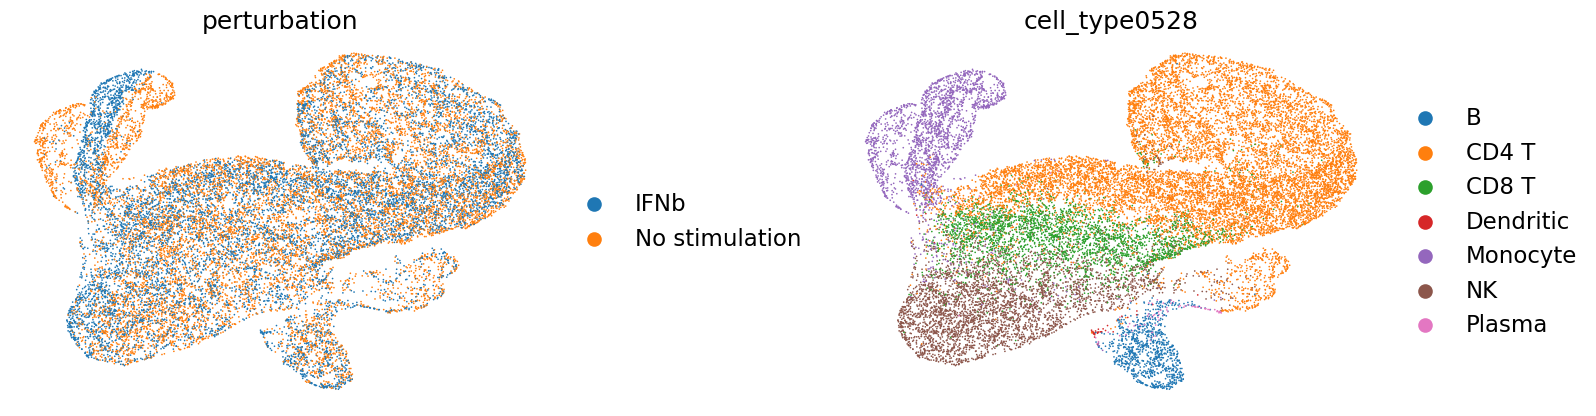

['/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3'
 '/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/library']
LISI---


cLISI, bLISI, LISI_F1 0.9647100484886691 0.5667962896486828 0.714060480788085


ASW---


asw_label 0.6051152721047401


asw_batch 0.8794332199880148


kBET---


0 labels consist of a single batch or is too small. Skip.
Adding diffusion to step 4


Adding diffusion to step 4


Adding diffusion to step 5


Adding diffusion to step 6


Adding diffusion to step 7


Adding diffusion to step 8


Adding diffusion to step 9


Adding diffusion to step 10


Adding diffusion to step 4


Adding diffusion to step 5


Adding diffusion to step 6


Adding diffusion to step 7


Adding diffusion to step 8


Adding diffusion to step 9


Adding diffusion to step 10


Adding diffusion to step 4


Adding diffusion to step 4


Adding diffusion to step 5


Adding diffusion to step 6


Adding diffusion to step 7


Adding diffusion to step 8


Adding diffusion to step 9


Adding diffusion to step 10


Adding diffusion to step 11


Adding diffusion to step 4


Adding diffusion to step 5


Adding diffusion to step 6


Adding diffusion to step 7


Adding diffusion to step 4
Adding diffusion to step 5


kbet_score 0.8969188315123896
graph_conn 0.9034971189041929


NMI, ARI ---
NMI 0.5425710839663621
ARI 0.3607516703689342
positive and true positive rate---


        ASW_label       ARI       NMI  1-cLISI     bLISI  ASW_batch  \
latent   0.605115  0.360752  0.542571  0.96471  0.566796   0.879433   

        kBET Accept Rate  graph connectivity  PCR_batch  pos rate  \
latent          0.896919            0.903497        0.0  0.903069   

        true pos rate  F1 LISI  
latent       0.363898  0.71406  


In [5]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

adata = sc.read_h5ad('../data/PBMC_yale_preprocessed.h5ad')
run_sccape(adata=adata, condition_key='perturbation', cell_type_key='cell_type0528', exp_label='IFNb', ref_label='No stimulation', dataset_name="PBMC_yale")

# The Rhinovirus infection dataset

https://datadryad.org/stash/dataset/doi:10.5061/dryad.4xgxd25g1

AnnData object with n_obs × n_vars = 12255 × 3608
    obs: 'batch', 'leiden', 'cell_type1021', 'condition'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type1021_colors', 'cell_type1021_sizes', 'hvg', 'leiden', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


Computing W matrices...


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #100

......... Iteration #200

......... Iteration #300

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #100

......... Iteration #200

......... Iteration #300

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


Computing reconstruction errors...


Finding optimal factor number k...


Finish oNMF initialization. See the results in folder:z_virus/oNMF


Performing automatic train-test split with 0.2 ratio...
Assigned 0 control cells.
Performing DEG analysis...


Performing leiden clustering...


Finish epoch:4
loss:1.0374770577137287
iteration:195
l2 loss: 0.001144971429871825


Finish epoch:9
loss:1.030118479178502
iteration:390
l2 loss: 0.0021157341722685555


Finish epoch:14
loss:1.0208249413050139
iteration:585
l2 loss: 0.002743524242526828


Finish epoch:19
loss:1.018460249289488
iteration:780
l2 loss: 0.00333479764417578


Finish epoch:24
loss:1.0130148774538286
iteration:975
l2 loss: 0.003565567676933148


Finish epoch:29
loss:1.0107880677932348
iteration:1170
l2 loss: 0.003439120834884353


Finish epoch:34
loss:1.0049879459234385
iteration:1365
l2 loss: 0.0032541792756185317


Finish epoch:39
loss:1.0029840026146326
iteration:1560
l2 loss: 0.003067765934154009


Finish epoch:44
loss:0.9998365625357016
iteration:1755
l2 loss: 0.0030314931884790077


Finish epoch:49
loss:0.9943831303180792
iteration:1950
l2 loss: 0.0027496593658072064


Finish epoch:54
loss:0.9967070069068518
iteration:2145
l2 loss: 0.0023333308740686146


Finish epoch:59
loss:0.9984444884153513
iteration:2340
l2 loss: 0.002038453795159092


Finish epoch:64
loss:0.9902739585974277
iteration:2535
l2 loss: 0.0019199436900611871
Training stop at epoch 64
Plotting the loss and metrics...


Calculating the basal state and factor-level expression of each cell...


Checking the mixing performance...
Error occurred during scCAPE training: list.remove(x): x not in list


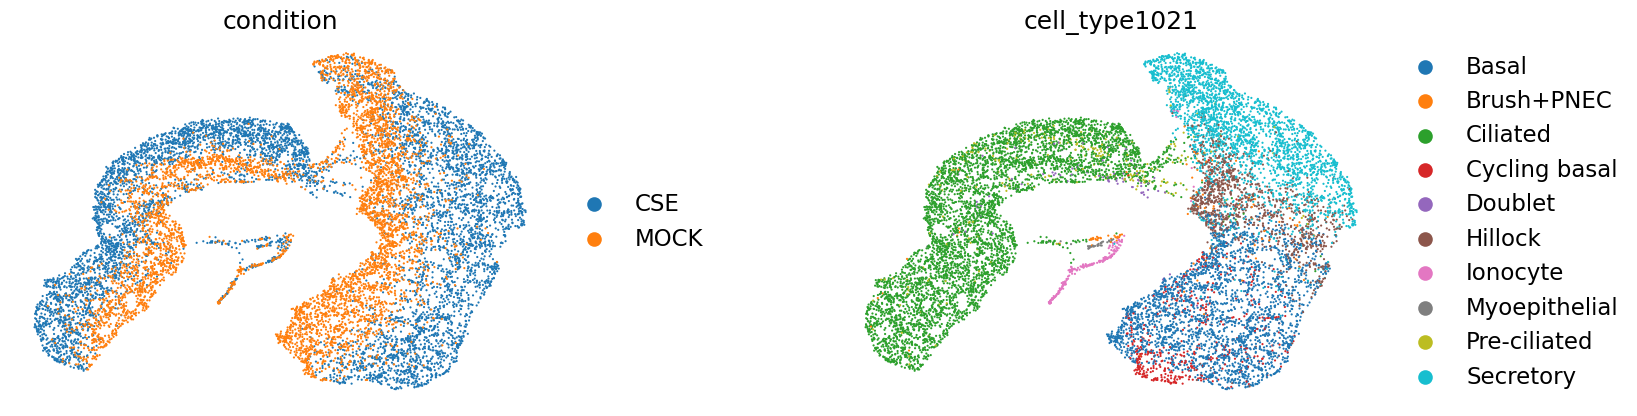

['/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3'
 '/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/library']
LISI---


cLISI, bLISI, LISI_F1 0.9732748823813944 0.27018744670714545 0.4229587809187292


ASW---


asw_label 0.5256739910691977


asw_batch 0.7853680395107826


kBET---


0 labels consist of a single batch or is too small. Skip.


Adding diffusion to step 4


Adding diffusion to step 5


Adding diffusion to step 4
Adding diffusion to step 5


Adding diffusion to step 4


Adding diffusion to step 5


Adding diffusion to step 4
Adding diffusion to step 5


Adding diffusion to step 4


Adding diffusion to step 4
Adding diffusion to step 5


Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6


Adding diffusion to step 4


Adding diffusion to step 5


Adding diffusion to step 6


kbet_score 0.3207041529343193
graph_conn 0.8681139403478454


NMI, ARI ---
NMI 0.6558969721636438
ARI 0.5259642275101571
positive and true positive rate---


        ASW_label       ARI       NMI   1-cLISI     bLISI  ASW_batch  \
latent   0.525674  0.525964  0.655897  0.973275  0.270187   0.785368   

        kBET Accept Rate  graph connectivity  PCR_batch  pos rate  \
latent          0.320704            0.868114        0.0  0.881518   

        true pos rate   F1 LISI  
latent       0.128764  0.422959  


In [6]:
adata=sc.read_h5ad("../data/rvcse_221021.h5ad")
adata=adata[adata.obs["batch"].isin(['CSE',"MOCK"])].copy()
adata.obs["condition"]=adata.obs["batch"].copy()
run_sccape(adata=adata, condition_key='condition', cell_type_key="cell_type1021", exp_label='CSE', ref_label='MOCK', dataset_name="virus")

# (EC)CITE-seq

https://www.nature.com/articles/s41588-021-00778-2

AnnData object with n_obs × n_vars = 20729 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'NT', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase', 'n_genes'
    var: 'name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'HTO_classification_colors', 'MULTI_ID_colors', 'Phase_colors', 'gene_target_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'perturbation_colors', 'replicate_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


Computing W matrices...


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #100

......... Iteration #200

......... Iteration #300

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #100

......... Iteration #200

......... Iteration #300

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


Computing reconstruction errors...


Finding optimal factor number k...


Finish oNMF initialization. See the results in folder:z_ECCITE/oNMF
Performing automatic train-test split with 0.2 ratio...


Assigned 0 control cells.
Performing DEG analysis...


Performing leiden clustering...


Finish epoch:4
loss:0.34236377752744235
iteration:325
l2 loss: 0.009346822735208732


Finish epoch:9
loss:0.2902286112308502
iteration:650
l2 loss: 0.022544721198769716


Finish epoch:14
loss:0.23199614928318904
iteration:975
l2 loss: 0.035496737693364804


Finish epoch:19
loss:0.1857016861438751
iteration:1300
l2 loss: 0.040283888406478445


Finish epoch:24
loss:0.1583732157945633
iteration:1625
l2 loss: 0.0366248301588572


Finish epoch:29
loss:0.14355686261103703
iteration:1950
l2 loss: 0.03011280670762062


Finish epoch:34
loss:0.13549036452403435
iteration:2275
l2 loss: 0.023527038412598462


Finish epoch:39
loss:0.13168192918484029
iteration:2600
l2 loss: 0.018843463922922427


Finish epoch:44
loss:0.12901709629939154
iteration:2925
l2 loss: 0.014568677086096543


Finish epoch:49
loss:0.12705417092029864
iteration:3250
l2 loss: 0.011830628548677152


Finish epoch:54
loss:0.12580583703059417
iteration:3575
l2 loss: 0.009868135475195371


Finish epoch:59
loss:0.12474506474458254
iteration:3900
l2 loss: 0.008472804954418768


Finish epoch:64
loss:0.12405077849443143
iteration:4225
l2 loss: 0.007463503199128004


Finish epoch:69
loss:0.12277110184614475
iteration:4550
l2 loss: 0.006285861141693133


Finish epoch:74
loss:0.12201198591635777
iteration:4875
l2 loss: 0.0056656796485185625


Finish epoch:79
loss:0.12207247282450016
iteration:5200
l2 loss: 0.00487336112329593


Finish epoch:84
loss:0.12084318468203911
iteration:5525
l2 loss: 0.004362523849480427


Finish epoch:89
loss:0.12055146522246875
iteration:5850
l2 loss: 0.003970190431349553


Finish epoch:94
loss:0.11971881297918466
iteration:6175
l2 loss: 0.0035946335894270587
Training stop at epoch 94
Plotting the loss and metrics...


Calculating the basal state and factor-level expression of each cell...


Checking the mixing performance...
Error occurred during scCAPE training: list.remove(x): x not in list


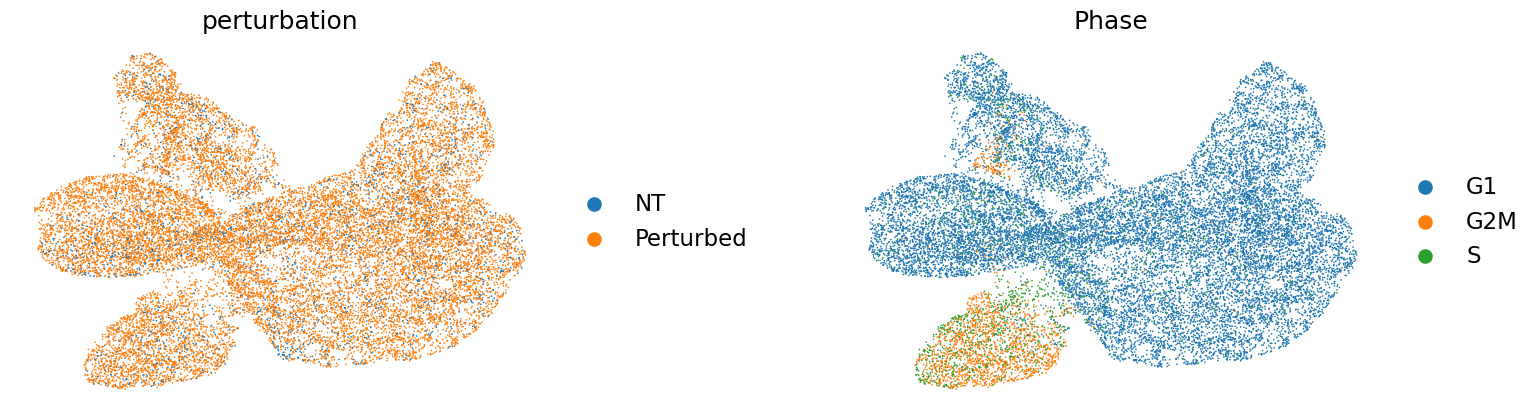

['/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3'
 '/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/library']
LISI---


cLISI, bLISI, LISI_F1 0.9236290847396704 0.23983628604816384 0.38079305999460294


ASW---


asw_label 0.4648887887597084


asw_batch 0.9651956243584882


kBET---


0 labels consist of a single batch or is too small. Skip.


Adding diffusion to step 4


Adding diffusion to step 5


Adding diffusion to step 6


Adding diffusion to step 7


Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6


Adding diffusion to step 7
Adding diffusion to step 8


Adding diffusion to step 9


Adding diffusion to step 10


Adding diffusion to step 11


Adding diffusion to step 12


Adding diffusion to step 13


Adding diffusion to step 14


kbet_score 0.8944864177087579
graph_conn 0.8867356171294345


NMI, ARI ---
NMI 0.2188705843650652
ARI 0.08756579363407291
positive and true positive rate---


        ASW_label       ARI       NMI   1-cLISI     bLISI  ASW_batch  \
latent   0.464889  0.087566  0.218871  0.923629  0.239836   0.965196   

        kBET Accept Rate  graph connectivity  PCR_batch  pos rate  \
latent          0.894486            0.886736        0.0  0.923392   

        true pos rate   F1 LISI  
latent       0.848135  0.380793  


In [7]:
adata=sc.read_h5ad("../data/ECCITE.h5ad")
run_sccape(adata=adata, condition_key='perturbation', cell_type_key="Phase", exp_label='NT', ref_label='Perturbed', dataset_name="ECCITE")

# ASD

https://singlecell.broadinstitute.org/single_cell/study/SCP1184/in-vivo-perturb-seq-reveals-neuronal-and-glial-abnormalities-associated-with-asd-risk-genes#study-download

AnnData object with n_obs × n_vars = 49067 × 2000
    obs: 'nGene', 'nUMI', 'Cluster', 'Batch', 'CellType', 'Perturbation', 'isKey', 'isAnalysed', 'SCRUBLET', 'perturb01'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Batch_colors', 'CellType_colors', 'Perturbation_colors', 'hvg', 'neighbors', 'pca', 'perturb01_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


Computing W matrices...


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #400

......... Iteration #300

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #400

......... Iteration #0

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #100

......... Iteration #0

......... Iteration #200

......... Iteration #100

......... Iteration #300

......... Iteration #200

......... Iteration #400

......... Iteration #300

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #400

......... Iteration #0

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #100

......... Iteration #0

......... Iteration #200

......... Iteration #100

......... Iteration #300

......... Iteration #200

......... Iteration #400

......... Iteration #300

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #400

......... Iteration #0

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #100

......... Iteration #0

......... Iteration #200

......... Iteration #100

......... Iteration #300

......... Iteration #200

......... Iteration #400

......... Iteration #300

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #400

......... Iteration #0

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #100

......... Iteration #0

......... Iteration #200

......... Iteration #100

......... Iteration #300

......... Iteration #200

......... Iteration #400

......... Iteration #300

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #0

......... Iteration #100

......... Iteration #100

......... Iteration #200

......... Iteration #200

......... Iteration #300

......... Iteration #300

......... Iteration #400

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #100

......... Iteration #200

......... Iteration #300

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


......... Iteration #0

......... Iteration #100

......... Iteration #200

......... Iteration #300

......... Iteration #400

......... Iteration #499

Orthogonal NMF performed with 500 iterations


Computing reconstruction errors...


Finding optimal factor number k...


Finish oNMF initialization. See the results in folder:z_ASD/oNMF


Performing automatic train-test split with 0.2 ratio...


Assigned 0 control cells.
Performing DEG analysis...


Performing leiden clustering...


Finish epoch:4
loss:2.0008621858311937
iteration:770
l2 loss: 0.08770264327139049


Finish epoch:9
loss:1.7044523056451377
iteration:1540
l2 loss: 0.1458820727738467


Finish epoch:14
loss:1.5420719911525775
iteration:2310
l2 loss: 0.1346329100333251


Finish epoch:19
loss:1.4327838397645332
iteration:3080
l2 loss: 0.12476793183134748


Finish epoch:24
loss:1.3474464385540454
iteration:3850
l2 loss: 0.11645842425815471


Finish epoch:29
loss:1.2798473618247292
iteration:4620
l2 loss: 0.10442511500282721


Finish epoch:34
loss:1.2294552720986403
iteration:5390
l2 loss: 0.09353879031229329


Finish epoch:39
loss:1.1954294357981001
iteration:6160
l2 loss: 0.07983183241509773


Finish epoch:44
loss:1.1713781596778274
iteration:6930
l2 loss: 0.06813597069545226


Finish epoch:49
loss:1.1487084363962148
iteration:7700
l2 loss: 0.06037199654459179


Finish epoch:54
loss:1.1323644596260865
iteration:8470
l2 loss: 0.05337454560031364


Finish epoch:59
loss:1.1181180895148934
iteration:9240
l2 loss: 0.04682665562571643


Finish epoch:64
loss:1.107781746944824
iteration:10010
l2 loss: 0.04080162678736371


Finish epoch:69
loss:1.1015220013531772
iteration:10780
l2 loss: 0.03545459490511325


Finish epoch:74
loss:1.093940425228763
iteration:11550
l2 loss: 0.030147568891187766


Finish epoch:79
loss:1.0872741612521084
iteration:12320
l2 loss: 0.02630939112081156


Finish epoch:84
loss:1.0818706596052492
iteration:13090
l2 loss: 0.022778687853511278


Finish epoch:89
loss:1.0788596504694457
iteration:13860
l2 loss: 0.019604881898826594


Finish epoch:94
loss:1.0745386024574182
iteration:14630
l2 loss: 0.01719527327540246


Finish epoch:99
loss:1.072643217328307
iteration:15400
l2 loss: 0.015376372117694322


Finish epoch:104
loss:1.06963274386022
iteration:16170
l2 loss: 0.013585662420887452


Finish epoch:109
loss:1.0674537234492116
iteration:16940
l2 loss: 0.012191796463660219


Finish epoch:114
loss:1.0639027535141288
iteration:17710
l2 loss: 0.011481753792371843


Finish epoch:119
loss:1.062229536570512
iteration:18480
l2 loss: 0.010643972555635038


Finish epoch:124
loss:1.0629648705581567
iteration:19250
l2 loss: 0.009846443122905958
Training stop at epoch 124
Plotting the loss and metrics...


Calculating the basal state and factor-level expression of each cell...


Checking the mixing performance...
Error occurred during scCAPE training: list.remove(x): x not in list


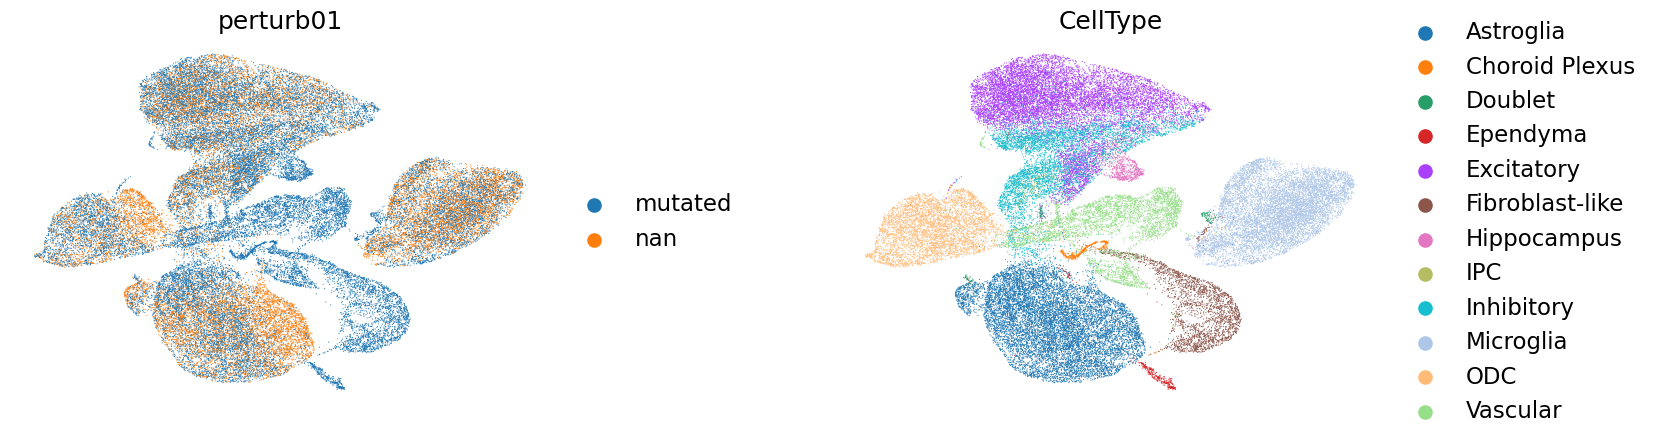

['/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3'
 '/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/library']
Cell cluster Vascular contains only one batch or has less than 10 cells. Skip.
Cell cluster Hippocampus contains only one batch or has less than 10 cells. Skip.
Cell cluster IPC contains only one batch or has less than 10 cells. Skip.
Cell cluster Choroid Plexus contains only one batch or has less than 10 cells. Skip.
Cell cluster Ependyma contains only one batch or has less than 10 cells. Skip.
Cell cluster Fibroblast-like contains only one batch or has less than 10 cells. Skip.
Cell cluster Doublet contains only one batch or has less than 10 cells. Skip.
LISI---


cLISI, bLISI, LISI_F1 0.9929124290782386 0.6859911530807685 0.8113975684722777


ASW---


asw_label 0.5905219316482544


asw_batch 0.9284414485043275


kBET---


7 labels consist of a single batch or is too small. Skip.


Adding diffusion to step 4


Adding diffusion to step 4


Adding diffusion to step 5


Adding diffusion to step 4


kbet_score 0.721746195701753
graph_conn 0.9386048467005125


NMI, ARI ---
NMI 0.856865634742268
ARI 0.8506431246377771
positive and true positive rate---


        ASW_label       ARI       NMI   1-cLISI     bLISI  ASW_batch  \
latent   0.590522  0.850643  0.856866  0.992912  0.685991   0.928441   

        kBET Accept Rate  graph connectivity  PCR_batch  pos rate  \
latent          0.721746            0.938605        0.0  0.967779   

        true pos rate   F1 LISI  
latent       0.719078  0.811398  


In [8]:
adata=sc.read_h5ad("../data/ASD.h5ad")
run_sccape(adata=adata, condition_key='perturb01', cell_type_key="CellType", exp_label='mutated', ref_label='nan', dataset_name="ASD")